In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [4]:
data_dir='..\\.keras\\datasets\\flower_photos-1\\'
data_dir = pathlib.Path(data_dir)

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3303 files belonging to 5 classes.
Using 2643 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3303 files belonging to 5 classes.
Using 660 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


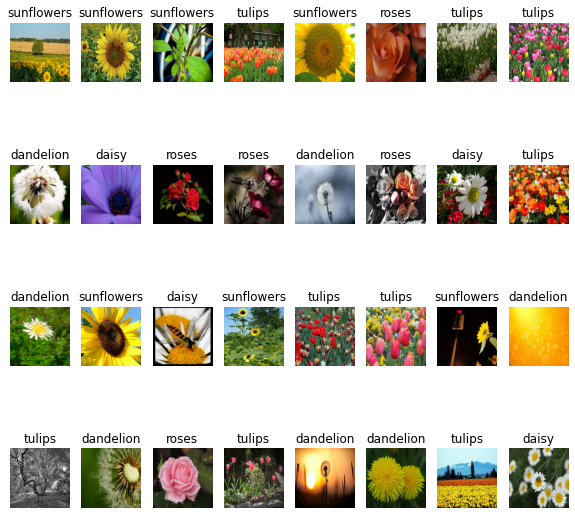

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(32):
        ax = plt.subplot(4, 8, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
normalization_layer = layers.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(image_batch[0]), np.max(image_batch[0])) 
print(first_image.shape)
print(image_batch.shape)

0.0 1.0
(180, 180, 3)
(32, 180, 180, 3)


In [14]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

## Train the model

In [17]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
83/83 [==============================] - 30s 352ms/step - loss: 1.5098 - accuracy: 0.3439 - val_loss: 1.2716 - val_accuracy: 0.4803
Epoch 2/10
83/83 [==============================] - 36s 434ms/step - loss: 1.1060 - accuracy: 0.5490 - val_loss: 1.0619 - val_accuracy: 0.5576
Epoch 3/10
83/83 [==============================] - 36s 432ms/step - loss: 0.9335 - accuracy: 0.6413 - val_loss: 1.0107 - val_accuracy: 0.6030
Epoch 4/10
83/83 [==============================] - 33s 404ms/step - loss: 0.7784 - accuracy: 0.7037 - val_loss: 1.0360 - val_accuracy: 0.6061
Epoch 5/10
83/83 [==============================] - 36s 437ms/step - loss: 0.5872 - accuracy: 0.7877 - val_loss: 1.2143 - val_accuracy: 0.5924
Epoch 6/10
83/83 [==============================] - 36s 435ms/step - loss: 0.4157 - accuracy: 0.8513 - val_loss: 1.2543 - val_accuracy: 0.5712
Epoch 7/10
83/83 [==============================] - 35s 419ms/step - loss: 0.2874 - accuracy: 0.9130 - val_loss: 1.4291 - val_accuracy: 0.6106

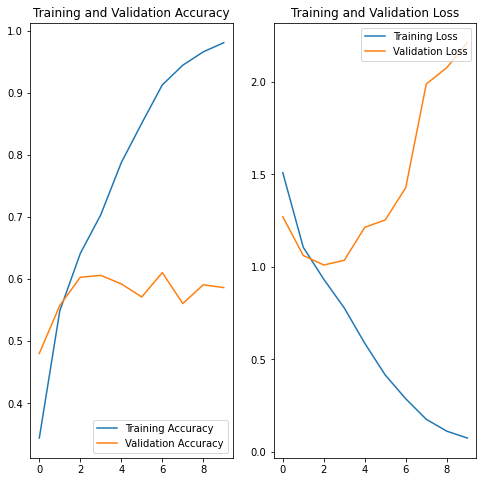

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
data_dir='..\\.keras\\datasets\\flower_photos-2\\'
data_dir = pathlib.Path(data_dir)

In [29]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  #validation_split=0.2,
  #subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 367 files belonging to 5 classes.


In [30]:
predictions = model.predict(test_ds)

12/12 [==============================] - 1s 79ms/step


In [31]:
print(predictions.shape)

(367, 5)


In [32]:
print(predictions)

[[ -2.359039   -14.524071    17.247103    -7.7763805   14.181782  ]
 [ -7.4731574  -37.775715    45.59029    -15.029497    37.259136  ]
 [ -7.07126     -4.3313947    6.17183      2.8389997   15.104142  ]
 ...
 [ -3.1453912   -0.07951258   3.791619     3.2370865   10.825726  ]
 [ -0.0944744    9.69627     -0.93617034  -3.6172342   -2.1743708 ]
 [ -5.1830697    3.7181582    3.061429     6.7883344    0.43138814]]


In [33]:
score= tf.nn.softmax(predictions)

In [35]:
k=0
name=[]
for images, labels in test_ds:
   # print(labels)
    k=k+1
    if k<=11:
        for i in range(32):
            name.append(class_names[labels[i]])
    if k==12:
        for i in range(15):
            name.append(class_names[labels[i]])

In [41]:
correct=0
for i in range(367):
    test_name=class_names[np.argmax(score[i])]
    #print(test_name,name[i])
    if test_name==name[i]:
        correct+=1

In [42]:
correct/367

0.2098092643051771